In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt


ModuleNotFoundError: No module named 'sklearn'

In [43]:
useco=pd.read_csv('USAGDPGrowth1961-2021.csv')
useco.head()

,Year,GDP,GDP per Capita,Growth
0,2021,"$22,996.10B","$69,288",5.67%
1,2020,"$20,893.74B","$63,028",-3.40%
2,2019,"$21,372.57B","$65,095",2.29%
3,2018,"$20,527.16B","$62,805",2.92%
4,2017,"$19,479.62B","$59,915",2.26%


Text(0, 0.5, 'Growth')

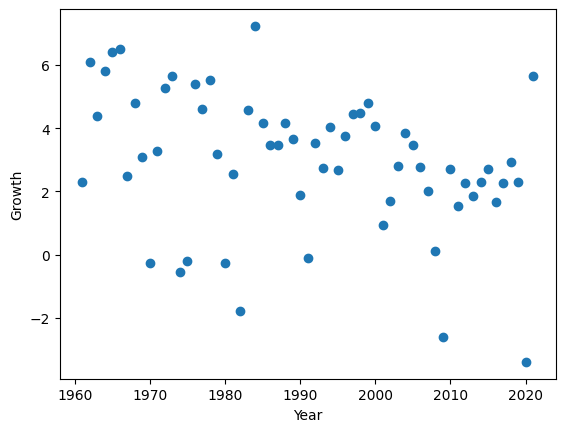

In [44]:

useco['Growth']=(useco['Growth'].str.strip('%').astype(float))
plt.scatter(useco.Year,useco['Growth'])
plt.xlabel('Year')
plt.ylabel('Growth')
#plt.xticks(list(range(1,max('Growth')+1)),[str(i) for i in range(1,max('Growth')+1)])

In [45]:
km=KMeans(n_clusters=4)
y_predicted=km.fit_predict(useco[['Year','Growth']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
useco['cluster']=y_predicted
useco.head()

,Year,GDP,GDP per Capita,Growth,cluster
0,2021,"$22,996.10B","$69,288",5.67,1
1,2020,"$20,893.74B","$63,028",-3.40,1
2,2019,"$21,372.57B","$65,095",2.29,1
3,2018,"$20,527.16B","$62,805",2.92,1
4,2017,"$19,479.62B","$59,915",2.26,1


In [47]:
km.cluster_centers_

array([[1.96850000e+03, 3.77875000e+00],
       [2.01400000e+03, 1.62133333e+00],
       [1.99900000e+03, 3.34066667e+00],
       [1.98400000e+03, 3.09000000e+00]])

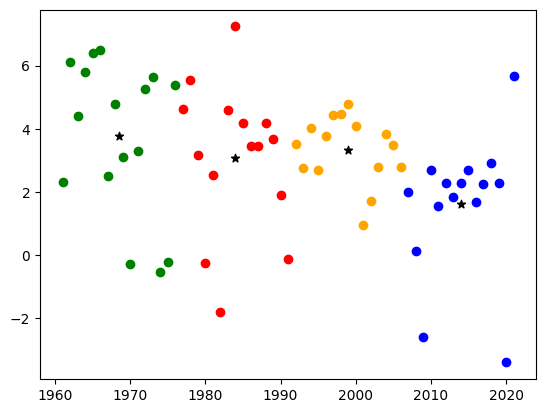

In [48]:
useco0=useco[useco['cluster']==0]
useco1=useco[useco['cluster']==1]
useco2=useco[useco['cluster']==2]
useco3=useco[useco['cluster']==3]
plt.scatter(useco0['Year'],useco0['Growth'],color='green')
plt.scatter(useco1['Year'],useco1['Growth'],color='blue')
plt.scatter(useco2['Year'],useco2['Growth'],color='orange')
plt.scatter(useco3['Year'],useco3['Growth'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')

In [49]:
scaler=MinMaxScaler()

scaler.fit(useco[['Growth']])
useco['GrowthScale']=scaler.transform(useco[['Growth']])

In [50]:
useco.head()

,Year,GDP,GDP per Capita,Growth,cluster,GrowthScale
0,2021,"$22,996.10B","$69,288",5.67,1,0.852444
1,2020,"$20,893.74B","$63,028",-3.40,1,0.000000
2,2019,"$21,372.57B","$65,095",2.29,1,0.534774
3,2018,"$20,527.16B","$62,805",2.92,1,0.593985
4,2017,"$19,479.62B","$59,915",2.26,1,0.531955


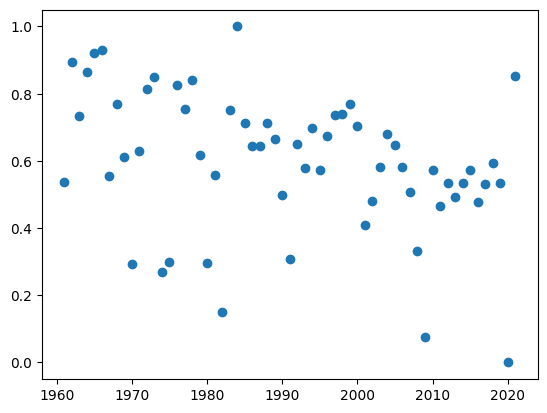

In [51]:
plt.scatter(useco['Year'],useco['GrowthScale'])

In [ ]:
sse=[]
k_rng=range(1,10)
for k in k_rng : 
    km=KMeans(n_clusters=k) 
    km.fit(useco[['Year','Growth']])  
    sse.append(km.inertia_)  


In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)